# RNN應用 - 股價預測

- ref: https://github.com/kevincwu0/rnn-google-stock-prediction
- 這邊[下載資料](https://raw.githubusercontent.com/kevincwu0/rnn-google-stock-prediction/master/Google_Stock_Price_Train.csv)。
- ref: https://ithelp.ithome.com.tw/articles/10206312

In [1]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt  # for 畫圖用
import pandas as pd

# Import the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')  # 讀取訓練集
training_set = dataset_train.iloc[:, 1:2].values  # 取「Open」欄位值

- 正規化

In [2]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

- Timesteps 設為 60 (不要太小，效果不好)

In [3]:
X_train = []   #預測點的前 60 天的資料
y_train = []   #預測點
for i in range(60, 1258):  # 1258 是訓練集總數
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)  # 轉成numpy array的格式，以利輸入 RNN


- Reshape資料

In [4]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

- 建立模型

In [5]:
# Import the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

In [6]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [7]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [8]:
# Compiling
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# 進行訓練
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 15s 132ms/step - loss: 0.0487
Epoch 2/100
38/38 [==============================] - 5s 137ms/step - loss: 0.0061
Epoch 3/100
38/38 [==============================] - 5s 140ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0051
Epoch 5/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0056
Epoch 6/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0050
Epoch 7/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0051
Epoch 9/100
38/38 [==============================] - 5s 137ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 5s 137ms/step - loss: 0.0046
Epoch 13/100

38/38 [==============================] - 5s 119ms/step - loss: 0.0017
Epoch 100/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0016


- 進行預測
- 2017 年的股票資料（真實）

In [9]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

- 取模型所預測的 2017 年股票資料（預測）

In [10]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs) # Feature Scaling

X_test = []
for i in range(60, 80):  # timesteps一樣60； 80 = 先前的60天資料+2017年的20天資料
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  # Reshape 成 3-dimension

- 進行預測

In [11]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)  # to get the original scale


In [12]:
predicted_stock_price

array([[770.1216 ],
       [767.36816],
       [766.7046 ],
       [767.73627],
       [770.77423],
       [776.13257],
       [781.6858 ],
       [784.7912 ],
       [785.5664 ],
       [785.1936 ],
       [784.7133 ],
       [784.4631 ],
       [784.43774],
       [784.90753],
       [785.7089 ],
       [789.1285 ],
       [795.0617 ],
       [802.174  ],
       [807.0958 ],
       [805.2387 ]], dtype=float32)

- 視覺化結果

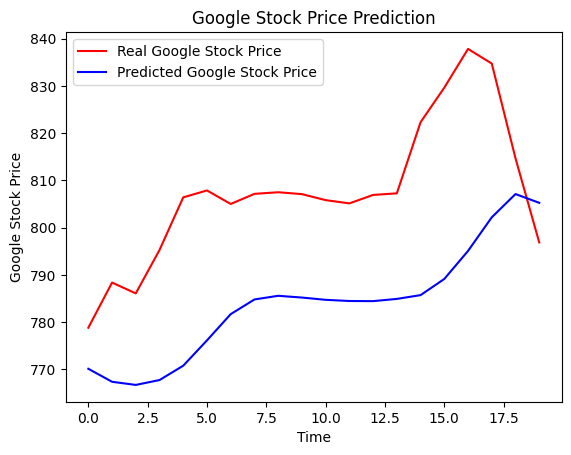

In [13]:
%matplotlib inline

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')  # 紅線表示真實股價
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')  # 藍線表示預測股價
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

### 因為在深度學習的應用，常常會有Python和套件版本相依性的問題存在，因此我們這邊提出確認版本的方法，未來電腦程式執行有問題時可以依此確認過!

In [2]:
import tensorflow
print(tensorflow.__version__)

2.8.2


In [3]:
import tensorflow.keras as ks
ks.__version__

'2.8.0'

In [4]:
!python --version

Python 3.7.13


## 載入資料、準備資料

In [5]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

備好資料

In [7]:
from tensorflow.keras.utils import to_categorical

# 將 training 的 input 資料轉為3維，並 normalize 把顏色控制在 0 ~ 1 之間
X_train = X_train.reshape(-1, 28, 28) / 255.      
X_test = X_test.reshape(-1, 28, 28) / 255.
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

----
## 試試看基本的RNN類神經網路

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

model.add(layers.SimpleRNN(
    # 如果後端使用tensorflow，batch_input_shape 的 batch_size 需設為 None.
    # 否則執行 model.evaluate() 會有錯誤產生.
    batch_input_shape=(None, 28, 28), 
    units= 50,
    unroll=True,
)) 

model.add(layers.Dense(units=10, kernel_initializer='normal', activation='softmax'))


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                3950      
                                                                 
 dense (Dense)               (None, 10)                510       
                                                                 
Total params: 4,460
Trainable params: 4,460
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [12]:
model.fit(X_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 8s 6ms/step - loss: 1.3728 - accuracy: 0.5432
Epoch 2/5
938/938 [==============================] - 5s 6ms/step - loss: 0.8256 - accuracy: 0.7415
Epoch 3/5
938/938 [==============================] - 5s 6ms/step - loss: 0.6730 - accuracy: 0.7855
Epoch 4/5
938/938 [==============================] - 5s 6ms/step - loss: 0.5838 - accuracy: 0.8141
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.5246 - accuracy: 0.8342


In [13]:
# 再使用測試資料進行評估
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4547 - accuracy: 0.8620


### 為何這麼差，因為我們設計的太簡單了，層數非常的少

----
## 再來一次

In [1]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 將 training 的 input 資料轉為3維，並 normalize 把顏色控制在 0 ~ 1 之間
X_train = X_train.reshape(-1, 28, 28) / 255.      
X_test = X_test.reshape(-1, 28, 28) / 255.
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)



In [2]:
# 建立RNN

from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

model.add(layers.SimpleRNN(
    # 如果後端使用tensorflow，batch_input_shape 的 batch_size 需設為 None.
    # 否則執行 model.evaluate() 會有錯誤產生.
    batch_input_shape=(None, 28, 28), 
    units= 50,
    unroll=True,
)) 

model.add( layers.Dense(64, activation='relu') )
model.add( layers.Dense(10, activation='softmax') )

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                3950      
                                                                 
 dense (Dense)               (None, 64)                3264      
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 7,864
Trainable params: 7,864
Non-trainable params: 0
_________________________________________________________________


In [4]:
# compile 並訓練

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=64)

Epoch 1/5


KeyboardInterrupt: 

In [ ]:
# 再使用測試資料進行評估
test_loss, test_acc = model.evaluate(X_test, y_test)

### 只是好了些…

## 試試LSTM

In [22]:
model_input_shape = X_train.shape[1:]

model = models.Sequential()

model.add(layers.LSTM(16, input_shape = model_input_shape, return_sequences=True))
model.add(layers.LSTM(16, return_sequences=False))

model.add(layers.Dense(64, activation='relu', name='dense_1'))
model.add(layers.Dense(10, activation='softmax') )
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 28, 16)            2880      
                                                                 
 lstm_1 (LSTM)               (None, 16)                2112      
                                                                 
 dense_1 (Dense)             (None, 64)                1088      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 6,730
Trainable params: 6,730
Non-trainable params: 0
_________________________________________________________________


In [23]:
# compile 並訓練

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 33s 29ms/step - loss: 0.9506 - accuracy: 0.6740
Epoch 2/5
938/938 [==============================] - 28s 30ms/step - loss: 0.3849 - accuracy: 0.8760
Epoch 3/5
938/938 [==============================] - 35s 38ms/step - loss: 0.2481 - accuracy: 0.9248
Epoch 4/5
938/938 [==============================] - 34s 36ms/step - loss: 0.1875 - accuracy: 0.9427
Epoch 5/5
938/938 [==============================] - 31s 33ms/step - loss: 0.1549 - accuracy: 0.9536


## ---- 以下是之前的NN & CNN參考比較用 ----

In [ ]:
# 舊版是這樣
#from keras import models
#from keras import layers
#from keras.datasets import mnist
#from keras.utils import to_categorical


In [6]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [11]:
# 建立一個小型的cnn
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add( layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)) )
model.add( layers.MaxPooling2D((2, 2)) )

model.add( layers.Conv2D(64, (3, 3), activation='relu') )
model.add( layers.MaxPooling2D((2, 2)) )

model.add( layers.Conv2D(64, (3, 3), activation='relu') )

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

In [13]:
# 再加入Dense密集層，這邊需要先展平

model.add( layers.Flatten() )
model.add( layers.Dense(64, activation='relu') )
model.add( layers.Dense(10, activation='softmax') )

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

In [15]:
#- 備資料
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#- 整理資料
train_images = train_images.reshape((60000, 28, 28, 1))  #reshape 是 NumPy 陣列的 method
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

#- 準備標籤
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [16]:
# compile 並訓練

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 50s 52ms/step - loss: 0.1660 - accuracy: 0.9489
Epoch 2/5
938/938 [==============================] - 49s 53ms/step - loss: 0.0454 - accuracy: 0.9864
Epoch 3/5
938/938 [==============================] - 48s 51ms/step - loss: 0.0320 - accuracy: 0.9900
Epoch 4/5
938/938 [==============================] - 48s 51ms/step - loss: 0.0246 - accuracy: 0.9924
Epoch 5/5
938/938 [==============================] - 48s 51ms/step - loss: 0.0194 - accuracy: 0.9942


In [17]:
# 再使用測試資料進行評估
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 0.0246 - accuracy: 0.9923


### 相較之前的單純密集連接層NN的model，準確度提昇不少